# EMail Spam Filtering

In [1]:
#Importing all the required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
#Reading the dataset containing the frequency of words in each mail
email = pd.read_csv("C:\\Users\\Bhumika Jindal\\FSP_ML_7th Sem\\emails.csv")
email.head(20)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Checking for null values
email.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [4]:
#Observing the description of every column
email.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Visualization of the Dataset

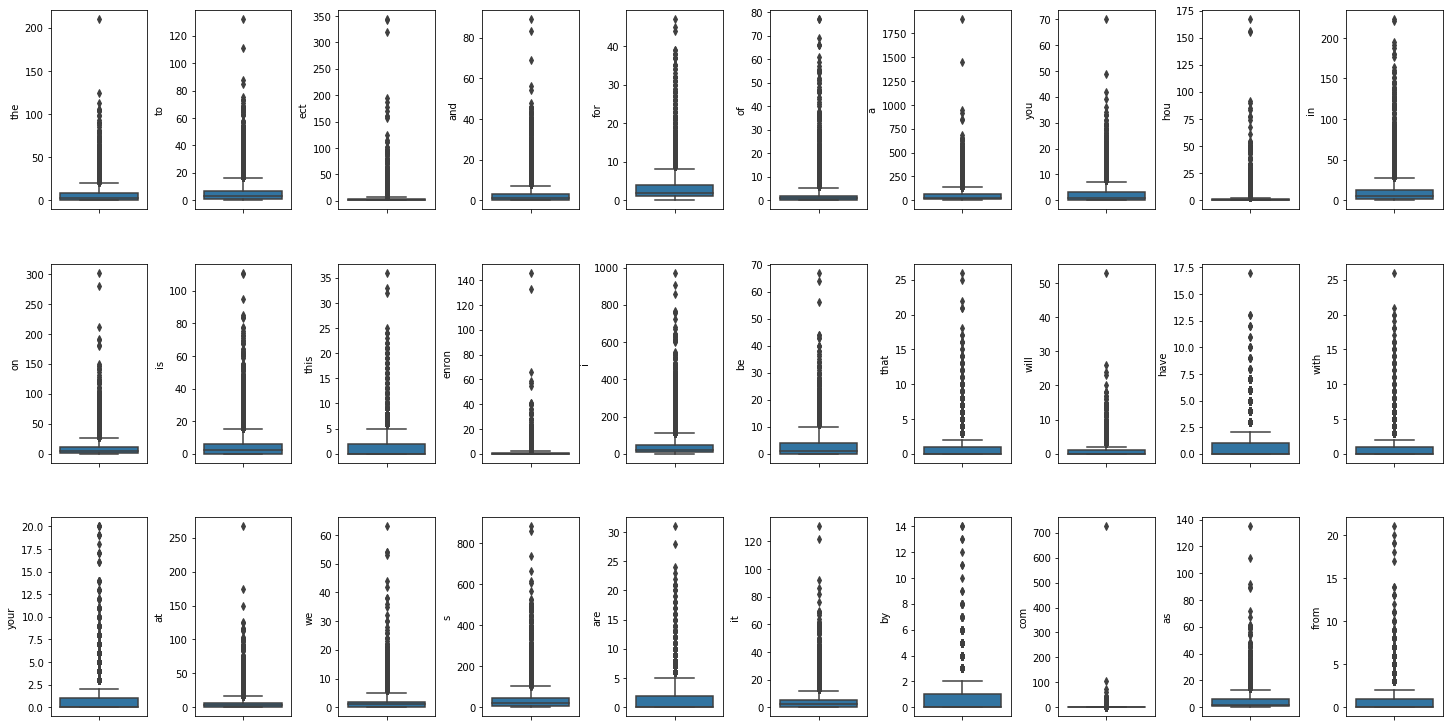

In [5]:
#Box plot for first 30 columns containing words
fig,axs=plt.subplots(ncols=10,nrows=3,figsize=(20,10))  #Gives width and height in figsize
index=0
axs=axs.flatten()  #To flatten to 1D
df=email.iloc[1:,1:]
for k,v in df.items(): #items is dataframe returning two values-index and names of allthe columns
    sns.boxplot(y=v,data=df,ax=axs[index],orient='v')
    if(index==29):
        break;
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)  #Used for styling

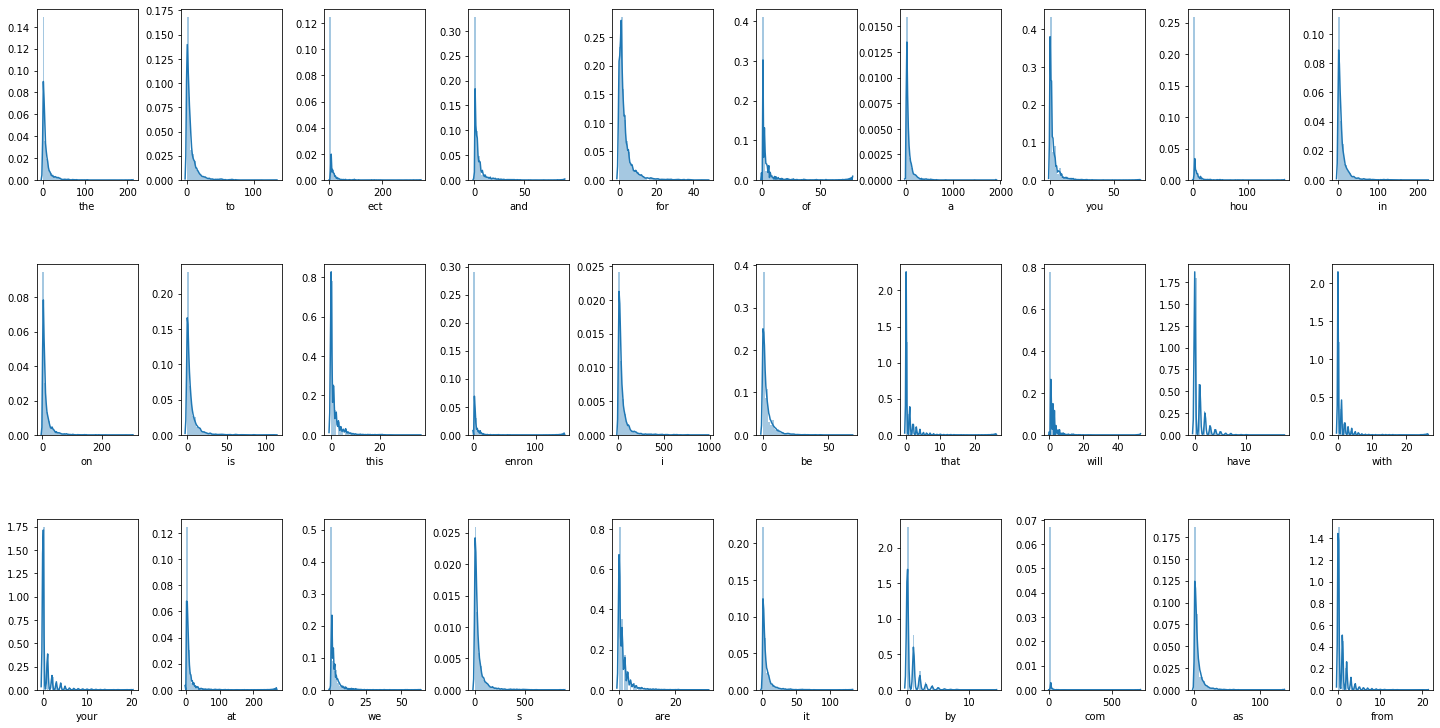

In [6]:
#Distplot for first 30 columns containing words
fig,axs=plt.subplots(ncols=10,nrows=3,figsize=(20,10)) 
index=0
axs=axs.flatten()  
df=email.iloc[1:,1:]
for k,v in df.items():
    sns.distplot(v,ax=axs[index])
    if(index==29):
        break;
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)  

In [7]:
#Checking the correlation among various features
email.corr()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


(2861.0, 0.0)

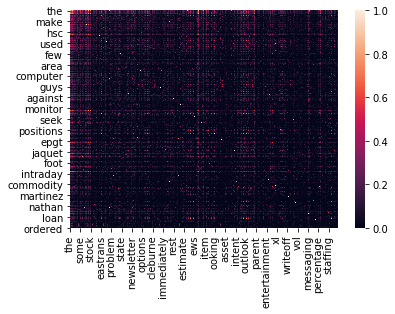

In [8]:
#Visual Representation of correlation matrix of all columns
#plt.figure(figsize=(20,20))  #size used to increase the size
ax=sns.heatmap(email.corr().abs())
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [9]:
email.groupby('Prediction').mean()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,6.673747,5.851307,6.232298,2.633715,3.133987,1.841776,49.485566,2.107298,2.595861,8.701797,...,0.007353,0.007081,0.016612,0.003268,0.074619,0.001906,0.000817,0.003540,0.67402,0.007353
1,6.559333,7.012667,2.479333,4.157333,3.102000,4.549333,70.283333,3.346000,0.625333,15.247333,...,0.001333,0.000000,0.002667,0.028667,0.155333,0.010000,0.020667,0.005333,1.50400,0.006000


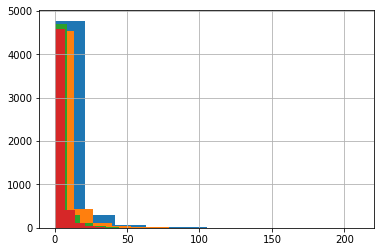

In [10]:
email['the'].hist()
email['to'].hist()
email['and'].hist()
email['you'].hist()

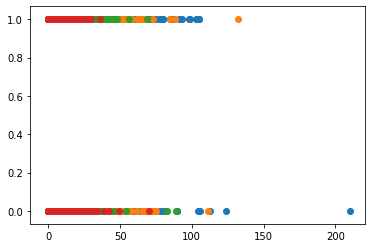

In [11]:
plt.scatter(email['the'],email['Prediction'])
plt.scatter(email['to'],email['Prediction'])
plt.scatter(email['and'],email['Prediction'])
plt.scatter(email['you'],email['Prediction'])

In [12]:
email.groupby('Prediction').count()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672,...,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672
1,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


Text(0.5, 1.0, 'Count of Number of Non-Spam(0) and Spam(1) Mails')

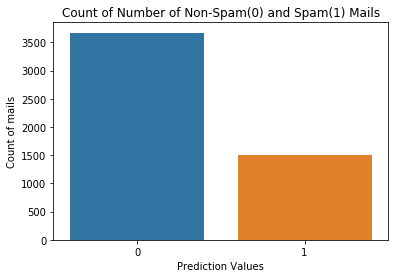

In [13]:
sns.countplot(x=email['Prediction'])
plt.xlabel("Prediction Values")
plt.ylabel("Count of mails")
plt.title("Count of Number of Non-Spam(0) and Spam(1) Mails")

([<matplotlib.patches.Wedge at 0x28d14f17518>,
 [Text(-0.8692196664065499, 0.6741343868488585, 'Spam'),
  Text(0.8692196664065501, -0.6741343868488582, 'Ham')],
 [Text(-0.47411981803993625, 0.36770966555392276, '29%'),
  Text(0.47411981803993636, -0.36770966555392265, '71%')])

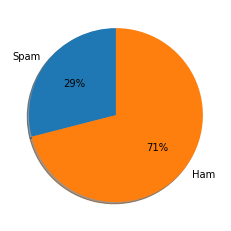

In [14]:
#Drawing the pie-chart for number of spam and non-spam emails
ham=(email.groupby('Prediction').count()).iloc[0][0]
spam=(email.groupby('Prediction').count()).iloc[1][0]
plt.pie([spam,ham], labels=['Spam','Ham'], autopct='%0.f%%', shadow=True, startangle=90)

# Finding Features and Label to apply ML Algorithms

In [15]:
#Finding the features and label for the model
x = email.iloc[:,1:3001]
y = email.iloc[:,-1].values  

In [16]:
x  #Features - All the columns that has frequency of different words

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [17]:
y  #The last column has the labels for prediction : 1 for spam, 0 for not spam. 

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
#Splitting the training set and the test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)

# Gausian Naive Bayes

In [19]:
#Applying Gausian Naive Bayes Algorithm
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

#Checking the accuracy score of train and test dataset
as_gnb = accuracy_score(y_pred_gnb,y_test)
ts_gnb = gnb.score(x_train,y_train)
print("\nNAIVE BAYES ALGORITHM\n---------------------")
print("Prediction Accuracy Score:",as_gnb)
print("Training Accuracy Score:",ts_gnb)


NAIVE BAYES ALGORITHM
---------------------
Prediction Accuracy Score: 0.9587628865979382
Training Accuracy Score: 0.9663330300272975


(2.0, 0.0)

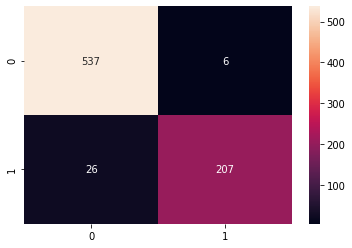

In [20]:
# Confusion Matrix for Gausian Naive Bayes Algorithm
cf_matrix_gnb=confusion_matrix(y_pred_gnb,y_test)
cm=pd.DataFrame(cf_matrix_gnb) 
ax=sns.heatmap(cm,fmt="d",annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Scaling the features

In [21]:
#Splitting the training set and the test set with different test size
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=0)

#Scaling the values in the features columns within a range 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)  

# Support Vector Classification

In [22]:
#Applying Support Vector Classification Algorithm
svc = SVC(C=0.001,kernel='linear') #C is the regularization parameter. As C increases, model overfits.
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

#Checking the accuracy score of train and test dataset
as_svc = accuracy_score(y_pred_svc,y_test)
ts_svc = svc.score(x_train,y_train)
print("\nSUPPORT VECTOR CLASSIFICATION ALGORITHM\n---------------------------------------")
print("Prediction Accuracy Score:",as_svc)
print("Training Accuracy Score:",ts_svc)


SUPPORT VECTOR CLASSIFICATION ALGORITHM
---------------------------------------
Prediction Accuracy Score: 0.9633204633204633
Training Accuracy Score: 0.9804469273743017


(2.0, 0.0)

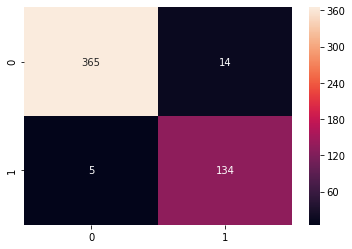

In [23]:
# Confusion Matrix for Support Vector Classifier 
cf_matrix_svm=confusion_matrix(y_pred_svc,y_test)
cm=pd.DataFrame(cf_matrix_svm) 
ax=sns.heatmap(cm,fmt="d",annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

# Random Forest Classification

In [24]:
#Applying Random Forest Classification Algorithm
rfc = RandomForestClassifier(n_estimators=150,criterion='entropy',min_samples_split=.01,random_state=0)
# n_estimators = No. of trees in the forest
# criterion = basis of making the decision tree split, either on gini impurity('gini'), or on information gain('entropy')
# min_samples_split = Minimum number of samples required to split an internal node
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

#Checking the accuracy score of train and test dataset
as_rfc = accuracy_score(y_pred_rfc,y_test)
ts_rfc = rfc.score(x_train,y_train)
print("\nRANDOM FOREST CLASSIFICATION ALGORITHM\n---------------------------------------")
print("Prediction Accuracy Score:",as_rfc)
print("Training Accuracy Score:",ts_rfc)


RANDOM FOREST CLASSIFICATION ALGORITHM
---------------------------------------
Prediction Accuracy Score: 0.9671814671814671
Training Accuracy Score: 0.9935539321014182


(2.0, 0.0)

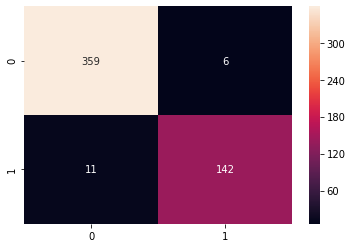

In [25]:
# Confusion Matrix for Random Forest Classifier
cf_matrix=confusion_matrix(y_pred_rfc,y_test)
cm=pd.DataFrame(cf_matrix) 
ax=sns.heatmap(cm,fmt="d",annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

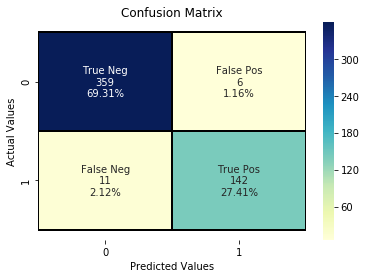

In [26]:
# Better Visualization of Confusion Matrix for Random Forest Classifier
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig,corr=plt.subplots(figsize=(6,4))
ax=sns.heatmap(cf_matrix, linewidths=.5,linecolor='black',annot=labels,fmt='',cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.6,top-0.6)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.savefig('Confusion Matrix')

In [27]:
#Classification Report for Random Forest Classifier
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       365
           1       0.96      0.93      0.94       153

    accuracy                           0.97       518
   macro avg       0.96      0.96      0.96       518
weighted avg       0.97      0.97      0.97       518



# Comparison of Above Three Algorithms

Text(0.5, 1.0, 'Accuracy score of different algorithms')

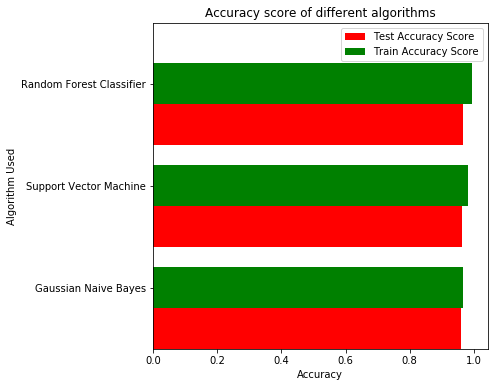

In [28]:
a_y=[as_gnb,as_svc,as_rfc]  #Accuracy Score of various algorithms
t_y=[ts_gnb,ts_svc,ts_rfc]  #Training Score of various algorithms
x=['Gaussian Naive Bayes','Support Vector Machine','Random Forest Classifier']

df = pd.DataFrame(dict(graph=x, n=a_y, m=t_y)) 
ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots(figsize=(6,6))

ax.barh(ind, df.n, width, color='red', label='Test Accuracy Score')
ax.barh(ind + width, df.m, width, color='green', label='Train Accuracy Score')
ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.xlabel('Accuracy')
plt.ylabel('Algorithm Used')
plt.title('Accuracy score of different algorithms')

We see in all the algorithms the train set accuracy is more than test accuracy. All the three algorithms almost have accuracy more than 95.5% approximately but the random forest classifier gives the best accuracy.